In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
wine_data=pd.read_csv(r"C:\Users\NIHAL_MIRAJ\Desktop\wine.csv")

In [3]:
wine_data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine_data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


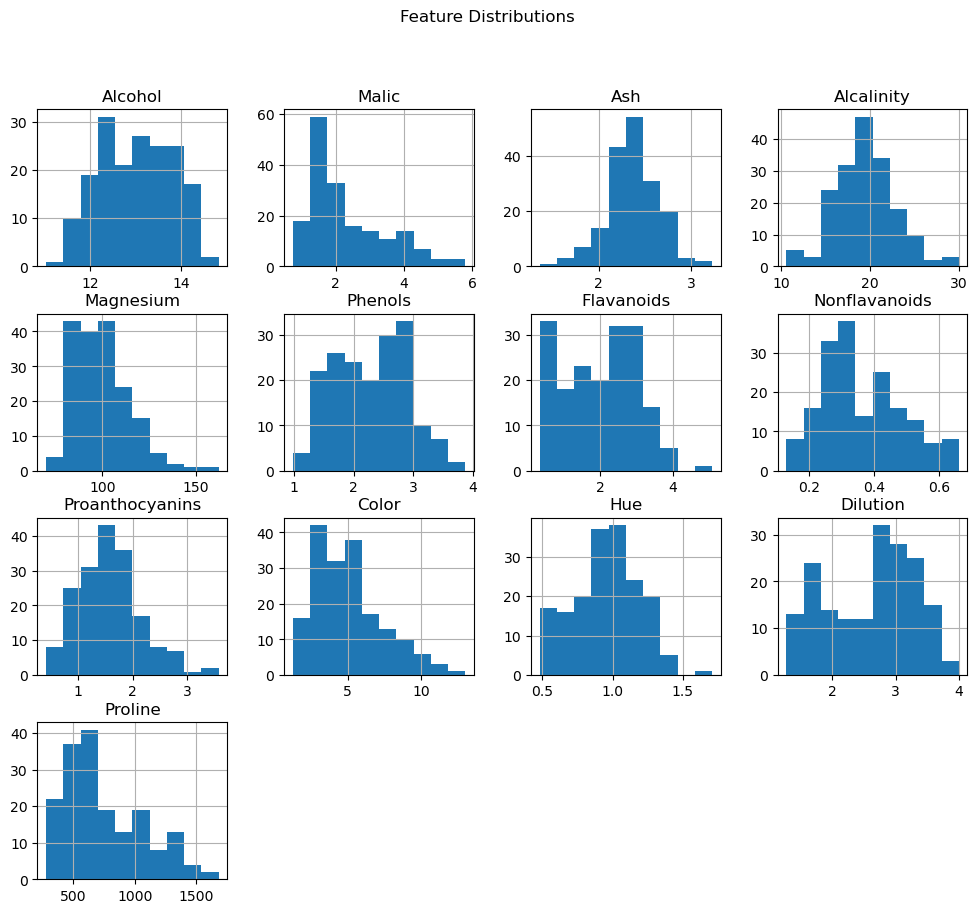

In [6]:
# 2. Distribution of features using histograms
wine_data.drop(columns='Type').hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

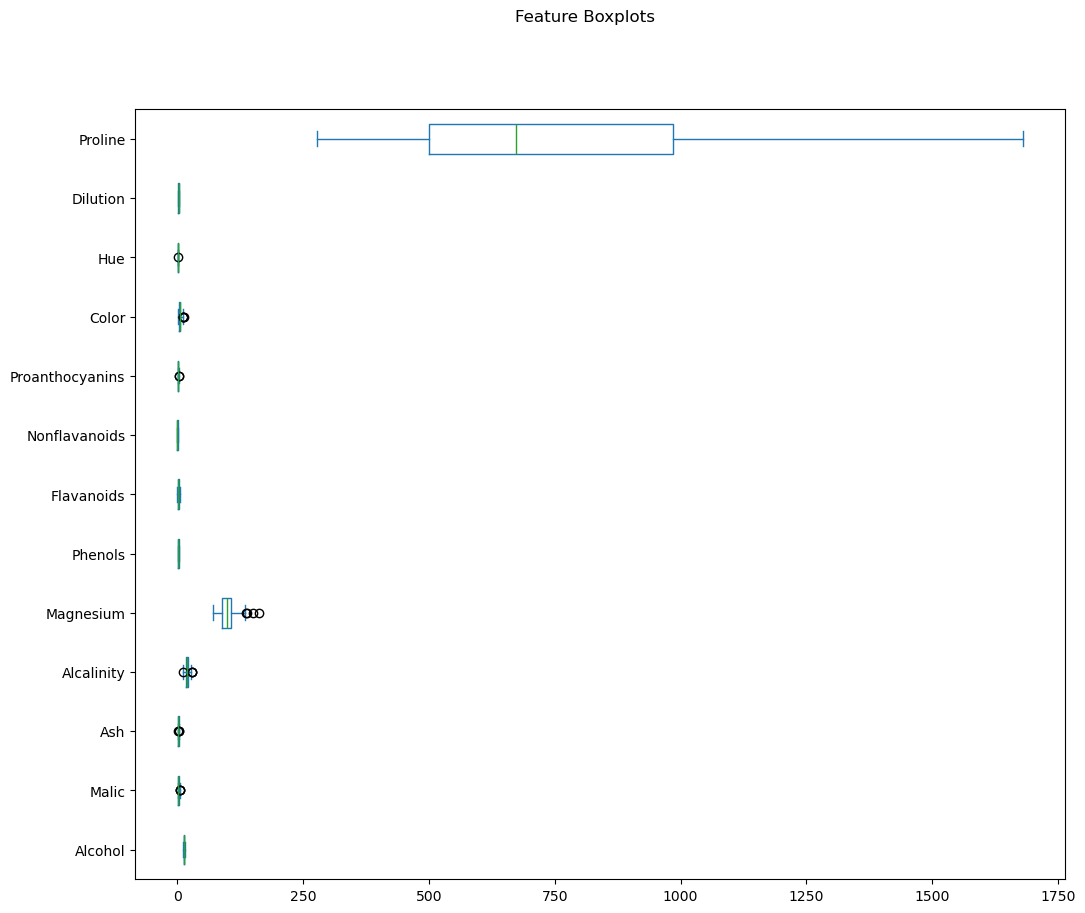

In [7]:
# Boxplots for feature distribution
wine_data.drop(columns='Type').plot(kind='box', figsize=(12, 10), vert=False)
plt.suptitle('Feature Boxplots')
plt.show()

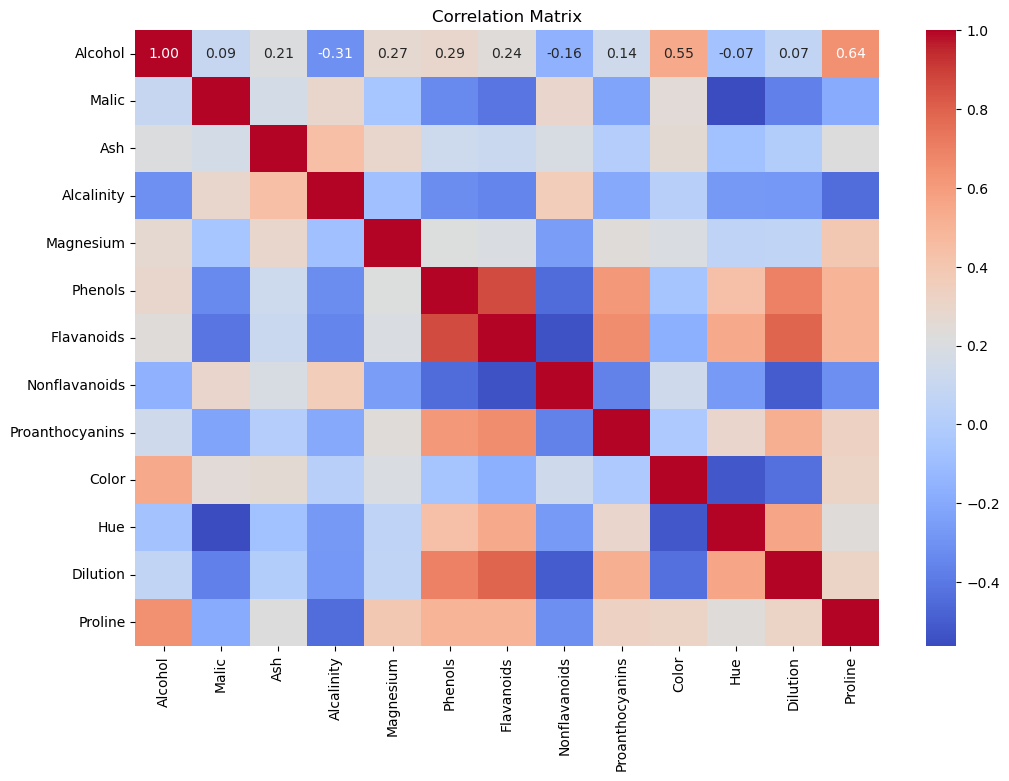

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.drop(columns='Type').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [9]:
wine_data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [11]:
# 1. Standardizing the data
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_data.drop(columns='Type'))

In [12]:
from sklearn.decomposition import PCA
pca = PCA()

In [13]:
wine_pca = pca.fit_transform(wine_scaled)

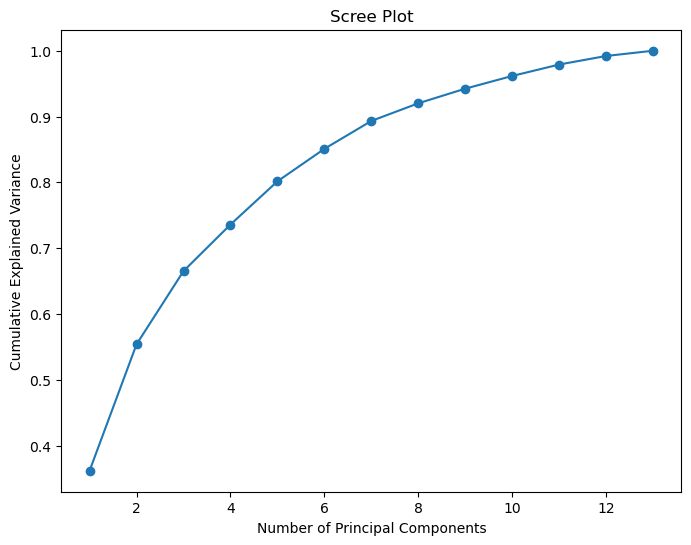

In [14]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [15]:
# Cumulative variance explained by each PC
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')

Explained variance by each component: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [18]:
#Transform the original dataset into the principal components
n_components = 3
pca = PCA(n_components=n_components)
wine_pca = pca.fit_transform(wine_scaled)

In [19]:
# 1. Apply K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
wine_clusters = kmeans.fit_predict(wine_scaled)

C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


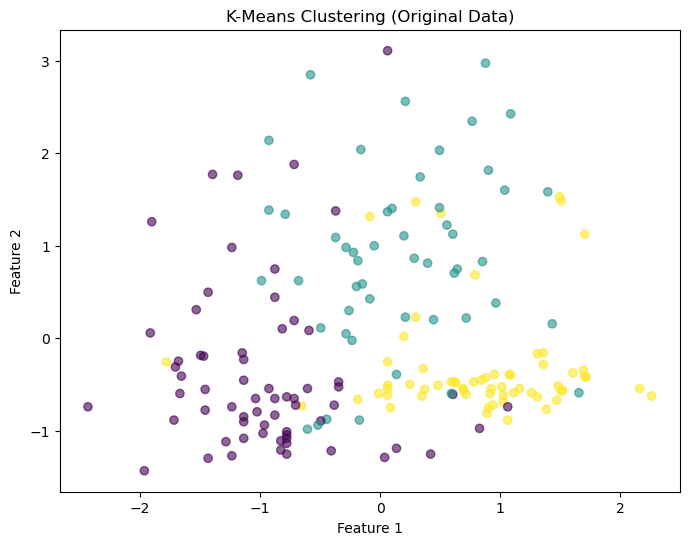

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(wine_scaled[:, 0], wine_scaled[:, 1], c=wine_clusters, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [22]:
sil_score = silhouette_score(wine_scaled, wine_clusters)
db_score = davies_bouldin_score(wine_scaled, wine_clusters)
print(f'Silhouette Score: {sil_score}')
print(f'Davies-Bouldin Index: {db_score}')

Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648


In [23]:
# 1. Apply K-Means Clustering to PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
wine_clusters_pca = kmeans_pca.fit_predict(wine_pca)

C:\Users\NIHAL_MIRAJ\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1411: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


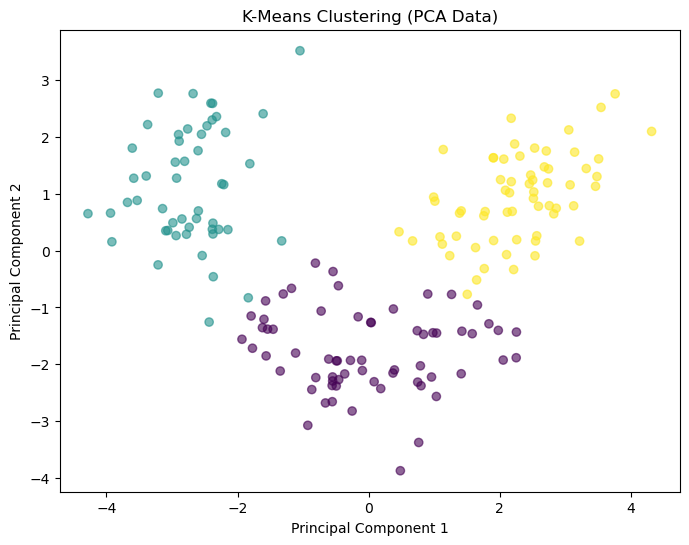

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=wine_clusters_pca, cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering (PCA Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
sil_score_pca = silhouette_score(wine_pca, wine_clusters_pca)
db_score_pca = davies_bouldin_score(wine_pca, wine_clusters_pca)
print(f'Silhouette Score (PCA): {sil_score_pca}')
print(f'Davies-Bouldin Index (PCA): {db_score_pca}')

Silhouette Score (PCA): 0.4537999848257614
Davies-Bouldin Index (PCA): 0.8388559996726341


In [26]:
print(f"Clustering results (original data) - Silhouette: {sil_score}, Davies-Bouldin: {db_score}")
print(f"Clustering results (PCA data) - Silhouette: {sil_score_pca}, Davies-Bouldin: {db_score_pca}")

Clustering results (original data) - Silhouette: 0.2848589191898987, Davies-Bouldin: 1.3891879777181648
Clustering results (PCA data) - Silhouette: 0.4537999848257614, Davies-Bouldin: 0.8388559996726341
